# Overview

Last week we used Euler's method for the first time.  Remember: If the acceleration of an object is **not constant**, it may be necessary to use a numerical approach, like Euler's method to solve the problem.  This week we will apply Euler's method to a two dimensional projectile motion situation.

## Example Problem

First, let's see how Euler's method could be used to find the trajectory of a projectile launched from an initial height of $h = 5 $m, with an initial speed of $v_i = 45$ m/s at an angle of $\theta = 35^\circ$ above the horizontal.  We will neglect the effect of air drag on this particle.  (In other words, we really don't need Euler's method for this problem, but it's still a good starting point for your learning.)

The solution is below:



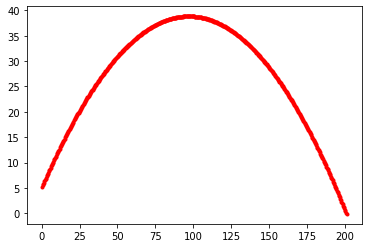

In [1]:
from numpy import pi,sin,cos,array
from matplotlib import pyplot

h=5
speed = 45
theta = 35 * pi/180
g = 9.8
dt = 0.01
t = 0

r = array([0,h])
v = array([speed * cos(theta), speed * sin(theta)])
a = array([0,-g])

pyplot.figure()
while r[1] >= 0:
    v = v + a * dt
    r = r + v * dt
    t = t + dt
    pyplot.plot(r[0],r[1],'r.')
pyplot.show()

Now do the following:

1. Look at every line of code and determine what is being done. Add a comment next to each line explaining the meaning of that line.
2. Play with the initial conditions and verify that the results seem reasonable.  Here are some ideas:
     1. Increase the launch height.  How does this affect the range of the particle?
     2. Increase the laungh angle.  
     3. Change the launch speed.
3.  Now modify the code above to solve the problem below.  Then answer the questions.


## Your Problem

Consider a $10.8$ kg projectile launched with an initial speed of $92.3$ m/s, at an angle
of $31.7^\circ$ . The force due to air resistance is $F_D = −bv$, where $b = 8.43$ kg/s. (This
is called linear drag because the velocity is not squared) The x- and y- components of the acceleration of the object are:

$$ a_x = - {b  v_x\over m}$$

$$ a_y = -g - {b  v_y\over m}$$

1. What is the range of this particle?
2. Use trial and error to determine the launch angle that results in maximum range of the projectile.

## Part 1, find the range of the particle

In [5]:
from numpy import pi, sin, cos

#set up constants
m = 10.8 #kg
v0 = 92.3 #m/s
theta = 31.7 *pi/180 #rad
b = 8.43
g = 9.8 #m/s^2

dt = 0.001

#variables
x = [0.0]
y = [0.0]

vx = [v0*cos(theta)]
vy = [v0*sin(theta)]

t = [0]

while y[-1] >= 0:
    ax = -b*vx[-1]/m
    ay = -g - b*vy[-1]/m

    vx.append(ax*dt + vx[-1])
    vy.append(ay*dt + vy[-1])

    x.append(vx[-1]*dt + x[-1])
    y.append(vy[-1]*dt + y[-1])

    t.append(dt + t[-1])

print(f'The range of the projectile is {x[-1]:.3} m. ')

The range of the projectile is 99.7 m. 


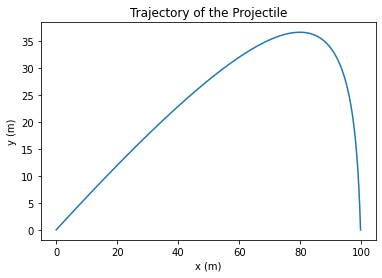

In [6]:
from matplotlib import pyplot as plt

plt.plot(x, y)
plt.title('Trajectory of the Projectile')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()

## Part 2, find the angle of maximum range. 

We can iterate through all the trajectories until we find that the range starts to go back down. 

In [18]:
from numpy import pi, sin, cos

#set up constants
m = 10.8 #kg
v0 = 92.3 #m/s
b = 8.43
g = 9.8 #m/s^2

dt = 0.001

#variables
x = [0.0]
y = [0.0]

vx = [v0*cos(theta)]
vy = [v0*sin(theta)]

t = [0]
theta = [1*pi/180]
dtheta = 0.05 *pi/180 #rad

max_range = -1

#iterate through theta until the range starts to get smaller for each new angle. 
while max_range < x[-1]:
    #set new theta
    theta.append(dtheta + theta[-1])

    #save 
    max_range = x[-1]

    #reset variables
    x = [0.0]
    y = [0.0]

    vx = [v0*cos(theta[-1])]
    vy = [v0*sin(theta[-1])]

    t = [0]

    

    while y[-1] >= 0:
        ax = -b*vx[-1]/m
        ay = -g - b*vy[-1]/m

        vx.append(ax*dt + vx[-1])
        vy.append(ay*dt + vy[-1])

        x.append(vx[-1]*dt + x[-1])
        y.append(vy[-1]*dt + y[-1])

        t.append(dt + t[-1])


print(f'The max range of the projectile is {max_range:.3f} m and has a range of {theta[-1]*180/pi:.1f} degrees. ')

The max range of the projectile is 107.456 m and has a range of 18.2 degrees. 
